<!--NOTEBOOK_HEADER-->
*This notebook contains course material from [CBE20255](https://jckantor.github.io/CBE20255)
by Jeffrey Kantor (jeff at nd.edu); the content is available [on Github](https://github.com/jckantor/CBE20255.git).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<!--NAVIGATION-->
< [Balancing Reactions](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/02.01-Balancing-Reactions.ipynb) | [Contents](toc.ipynb) | [Process Flows and Balances](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/03.00-Process-Flows-and-Balances.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/02.02-Generation-Consumption-Analysis-for-Ammonia-Production.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Generation Consumption Analysis

## Summary

This [Jupyter notebook](http://jupyter.org/notebook.html) demonstrate the use of the [symbolic algebra package `Sympy`](http://sympy.org/en/index.html) for the generation/consumption analysis for the production of ammonia using basic principles of reaction stoichiometry.

## Example: Ammonia Production

BASF, headquartered in Ludwigshafen, Germany, is the largest chemical company in the world. In 1913, under its original name Badische Anilin- und Soda-Fabrik, BASF commercialized the Haber-Bosch process for the production of ammonia from natural gas, water, and air. 

Prior to this invention, American and European agriculture was dependent on guano mined from the 'Guano Islands' in the Caribbean Sea and Pacific Ocean, and saltpeter mined from the deserts of Peru, Chile, and Bolivia. The competition for these limited resouces led to the notorious [U.S. Guano Islands Act of 1856](http://en.wikipedia.org/wiki/Guano_Islands_Act), and multiple wars (the Guano War, the [War of the Pacific](http://en.wikipedia.org/wiki/War_of_the_Pacific), later resulting in acute fertilizer shortages that was called  'the Wheat Problem' in England by Sir William Crookes in 1898. 

The following video produced by BASF provides a technical overview of the Haber-Bosch process. 

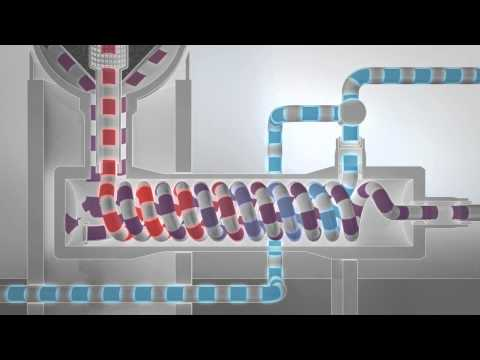

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("uMkzxV_y7tY",560,315,rel=0)

### Problem Statement

Consider three reactions for the production of ammonia

1. Steam-reforming of methane
<div style="margin-top:5px;margin-bottom:10px">
CH<sub>4</sub> + H<sub>2</sub>O &rarr; CO + 3 H<sub>2
</div>
2. Water-gas shift 
<div style="margin-top:5px;margin-bottom:10px">
CO + H<sub>2</sub>O &rarr; CO<sub>2</sub> + H<sub>2
</div>
3. Haber-Bosch reaction
<div style="margin-top:5px;margin-bottom:10px">
N<sub>2</sub> + 3 H<sub>2</sub> &rarr; 2 NH<sub>3</sub>
</div>

Determine if it is possible to construct a process for the production of ammonia with no wasted hydrogen and no release of carbon monoxide.

### Solution

We begin by setting up the stoichiometric matrix for generation/consumption analysis

| Species         | R<sub>1</sub> | R<sub>2</sub> | R<sub>3</sub> | Net                 |
| :-------------: | :-----------: | :-----------: | :-----------: | :-----------------: |
|                 | &chi;<sub>1</sub> | &chi;<sub>2</sub> | &chi;<sub>3</sub> | $\sum_k\nu_k\chi_k$ |
| CH<sub>4</sub>  | -1            |  0            |  0            | &leq; 0             |
| H<sub>2</sub>O  | -1            | -1            |  0            | &leq; 0             |
| CO              |  1            | -1            |  0            | 0                   |
| H<sub>2</sub>   |  3            |  1            | -3            | 0                   |
| CO<sub>2</sub>  |  0            |  1            |  0            | &geq; 0             |
| N<sub>2</sub>   |  0            |  0            |  1            | &leq; 0             |
| NH<sub>3</sub>  |  0            |  0            |  2            | 1                   |


which includes three equality constraints which need to be solved for
&chi;<sub>1</sub>, &chi;<sub>2</sub>, and &chi;<sub>3</sub>.

The first step is to import `sympy`.

In [2]:
import sympy

When imported in this way, the functions from `sympy` must be accessed with the prefix `sympy.`. This avoids overwriting functions with the same name as those in `sympy`, such as `plot`.

Next we use the `sympy.var` function to create three symbolic variables corresponding to &chi;<sub>1</sub>, &chi;<sub>2</sub>, and &chi;<sub>3</sub>.

In [3]:
sympy.var('x1 x2 x3')

(x1, x2, x3)

The net stoichiometric coefficients can be written in terms of the symbolic variables. 

In [4]:
v = dict()
v['CH4'] = -x1
v['H2O'] = -x1 - x2
v['CO']  = x1 - x2
v['H2']  = 3*x1 + x2 - 3*x3
v['CO2'] = x2
v['N2'] = -x3
v['NH3'] = 2*x3

The three process constraints are encoded as equations using the sympy function `Eq()`

In [5]:
eqns = [
    sympy.Eq(v['NH3'],1),  
    sympy.Eq(v['CO'],0),
    sympy.Eq(v['H2'],0)
]

These equations are solved for &chi;<sub>1</sub>, &chi;<sub>2</sub>, and &chi;<sub>3</sub>.

In [6]:
soln = sympy.solve(eqns)
print(soln)

{x2: 3/8, x3: 1/2, x1: 3/8}


To finish the problem, the solutions are substituted back into the expressions for the stoichiometric coefficients, and the non-zero coefficients are displayed.

In [7]:
for k in v.keys():
    a = v[k].subs(soln)
    if a != 0:
        print("{0:<3s} {1:>6s}".format(k,str(a)))

N2    -1/2
H2O   -3/4
NH3      1
CH4   -3/8
CO2    3/8


<!--NAVIGATION-->
< [Balancing Reactions](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/02.01-Balancing-Reactions.ipynb) | [Contents](toc.ipynb) | [Process Flows and Balances](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/03.00-Process-Flows-and-Balances.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/02.02-Generation-Consumption-Analysis-for-Ammonia-Production.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>